In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re #regex applies a regular expression to a string and returns the matching substrings. 
import matplotlib.pyplot as plt
import seaborn as sns 
import nltk 
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing
import nltk.corpus
from nltk.corpus import stopwords
from nltk.tokenize import BlanklineTokenizer
from nltk.tokenize import TweetTokenizer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
import string
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import  Counter
plt.style.use('ggplot')
stop=set(stopwords.words('english'))
import re

from nltk.tokenize import word_tokenize


from sklearn.model_selection import train_test_split

from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
from multiprocessing import Pool


[nltk_data] Downloading package punkt to C:\Users\Madhu
[nltk_data]     Com\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Madhu
[nltk_data]     Com\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Madhu
[nltk_data]     Com\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report

In [3]:
df=pd.read_csv("D:\\RESEARCH\\Booking.com  - Kandy-with label.csv")

In [4]:
df.head(2)

,hotel_name,overall_review_score,overall_review_text,staff_review,facility_review,cleanliness_review,comfort_review,value_for_money_review,location_review,free_wifi_review,...,travel_type,timeline,room_info,positive_comment,negative_comment,review_helpfulness,Unnamed: 21,Label,Unnamed: 23,Unnamed: 24
0,Hotel\nKandy City Hotel by Earl's,7.8,Good,8.0,7.9,8.9,7.6,7.8,7.6,7.0,...,Group,1 night · \n\nSeptember 2019,Superior Triple Room,The rooms were beyond what we expected. Clean ...,NaN,NaN,NaN,positive,NaN,NaN
1,Hotel\nKandy City Hotel by Earl's,7.8,Good,8.0,7.9,8.9,7.6,7.8,7.6,7.0,...,Group,2 nights · \n\nMarch 2021,Superior Double or Twin Room,My stay was extremely comfortable. A beautiful...,NaN,NaN,NaN,positive,NaN,NaN


In [5]:
df.columns

Index(['hotel_name', 'overall_review_score', 'overall_review_text',
       'staff_review', 'facility_review', 'cleanliness_review',
       'comfort_review', 'value_for_money_review', 'location_review',
       'free_wifi_review', 'reviewer_name', 'reviewer_country', 'review_title',
       'reviewed_on', 'personal_review_score', 'travel_type', 'timeline',
       'room_info', 'positive_comment', 'negative_comment',
       'review_helpfulness', 'Unnamed: 21', 'Label', 'Unnamed: 23',
       'Unnamed: 24'],
      dtype='object')

In [6]:
df.drop(df[['Unnamed: 21','Unnamed: 23','Unnamed: 24']],axis='columns',inplace=True)

In [7]:
df.head(2)

,hotel_name,overall_review_score,overall_review_text,staff_review,facility_review,cleanliness_review,comfort_review,value_for_money_review,location_review,free_wifi_review,...,review_title,reviewed_on,personal_review_score,travel_type,timeline,room_info,positive_comment,negative_comment,review_helpfulness,Label
0,Hotel\nKandy City Hotel by Earl's,7.8,Good,8.0,7.9,8.9,7.6,7.8,7.6,7.0,...,Absolutely amazing. Will come again,Reviewers' choice,10.0,Group,1 night · \n\nSeptember 2019,Superior Triple Room,The rooms were beyond what we expected. Clean ...,NaN,NaN,positive
1,Hotel\nKandy City Hotel by Earl's,7.8,Good,8.0,7.9,8.9,7.6,7.8,7.6,7.0,...,Excellent stay!,Reviewed: 14 March 2021,9.0,Group,2 nights · \n\nMarch 2021,Superior Double or Twin Room,My stay was extremely comfortable. A beautiful...,NaN,NaN,positive


In [8]:
print(df.shape)
df.dropna(how='all',inplace=True)
print(df.shape)

(4284, 22)
(4284, 22)


In [9]:
df.Label.value_counts()

positive    2698
neutral     1239
negative     290
Name: Label, dtype: int64

In [10]:
df.isnull().sum()

hotel_name                   0
overall_review_score         4
overall_review_text         61
staff_review                16
facility_review             16
cleanliness_review          16
comfort_review              16
value_for_money_review      16
location_review             16
free_wifi_review            63
reviewer_name               16
reviewer_country            18
review_title                23
reviewed_on                 25
personal_review_score       25
travel_type                 19
timeline                    19
room_info                  288
positive_comment            40
negative_comment          1642
review_helpfulness        4095
Label                       57
dtype: int64

In [11]:
df = df[pd.notnull(df['Label'])]
df.shape

(4227, 22)

In [12]:
df["positive_comment"].fillna("was", inplace = True)
df["negative_comment"].fillna("was",inplace=True)

In [13]:
df['review']=df['positive_comment']+df['negative_comment']
df['review']


0       The rooms were beyond what we expected. Clean ...
1       My stay was extremely comfortable. A beautiful...
2       Definitely worth for the price you pay. Very c...
3       Meals and location very goodBetter if you’ll c...
4       Worth for the money and their staff are very h...
                              ...                        
4279    The place is like a hotel. The owner family is...
4280    Amazing stay with such a happy welcoming famil...
4281    The host was amazing, and I loved the rooftop ...
4282    The owner and his family are very nice people,...
4283    The hotel is clean and tidy  and new. Mr sulta...
Name: review, Length: 4227, dtype: object

In [14]:
df2=df[['review','Label']]
df2.head()

,review,Label
0,The rooms were beyond what we expected. Clean ...,positive
1,My stay was extremely comfortable. A beautiful...,positive
2,Definitely worth for the price you pay. Very c...,neutral
3,Meals and location very goodBetter if you’ll c...,positive
4,Worth for the money and their staff are very h...,positive


In [15]:
import re

def clean_url(review_text):
    return re.sub(r'http\S+','',review_text)

df2['CleanReview']=df2['review'].apply(clean_url)
df2

<ipython-input-15-6702163b9bcb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['CleanReview']=df2['review'].apply(clean_url)


,review,Label,CleanReview
0,The rooms were beyond what we expected. Clean ...,positive,The rooms were beyond what we expected. Clean ...
1,My stay was extremely comfortable. A beautiful...,positive,My stay was extremely comfortable. A beautiful...
2,Definitely worth for the price you pay. Very c...,neutral,Definitely worth for the price you pay. Very c...
3,Meals and location very goodBetter if you’ll c...,positive,Meals and location very goodBetter if you’ll c...
4,Worth for the money and their staff are very h...,positive,Worth for the money and their staff are very h...
...,...,...,...
4279,The place is like a hotel. The owner family is...,positive,The place is like a hotel. The owner family is...
4280,Amazing stay with such a happy welcoming famil...,positive,Amazing stay with such a happy welcoming famil...
4281,"The host was amazing, and I loved the rooftop ...",positive,"The host was amazing, and I loved the rooftop ..."
4282,"The owner and his family are very nice people,...",positive,"The owner and his family are very nice people,..."


In [16]:
def clean_non_alphanumeric(review_text):
    return re.sub('[^a-zA-Z]',' ',review_text)

df2['CleanReview']=df2['CleanReview'].apply(clean_non_alphanumeric)
df2

<ipython-input-16-dbc382f80539>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['CleanReview']=df2['CleanReview'].apply(clean_non_alphanumeric)


,review,Label,CleanReview
0,The rooms were beyond what we expected. Clean ...,positive,The rooms were beyond what we expected Clean ...
1,My stay was extremely comfortable. A beautiful...,positive,My stay was extremely comfortable A beautiful...
2,Definitely worth for the price you pay. Very c...,neutral,Definitely worth for the price you pay Very c...
3,Meals and location very goodBetter if you’ll c...,positive,Meals and location very goodBetter if you ll c...
4,Worth for the money and their staff are very h...,positive,Worth for the money and their staff are very h...
...,...,...,...
4279,The place is like a hotel. The owner family is...,positive,The place is like a hotel The owner family is...
4280,Amazing stay with such a happy welcoming famil...,positive,Amazing stay with such a happy welcoming famil...
4281,"The host was amazing, and I loved the rooftop ...",positive,The host was amazing and I loved the rooftop ...
4282,"The owner and his family are very nice people,...",positive,The owner and his family are very nice people ...


In [17]:
def clean_lowercase(review_text):
    return str (review_text).lower()
df2['CleanReview']=df2['CleanReview'].apply(clean_lowercase)
df2

<ipython-input-17-0024a900a5b5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['CleanReview']=df2['CleanReview'].apply(clean_lowercase)


,review,Label,CleanReview
0,The rooms were beyond what we expected. Clean ...,positive,the rooms were beyond what we expected clean ...
1,My stay was extremely comfortable. A beautiful...,positive,my stay was extremely comfortable a beautiful...
2,Definitely worth for the price you pay. Very c...,neutral,definitely worth for the price you pay very c...
3,Meals and location very goodBetter if you’ll c...,positive,meals and location very goodbetter if you ll c...
4,Worth for the money and their staff are very h...,positive,worth for the money and their staff are very h...
...,...,...,...
4279,The place is like a hotel. The owner family is...,positive,the place is like a hotel the owner family is...
4280,Amazing stay with such a happy welcoming famil...,positive,amazing stay with such a happy welcoming famil...
4281,"The host was amazing, and I loved the rooftop ...",positive,the host was amazing and i loved the rooftop ...
4282,"The owner and his family are very nice people,...",positive,the owner and his family are very nice people ...


In [18]:
def clean_tokenization(review_text):
    return word_tokenize(review_text)

df2['CleanReview']=df2['CleanReview'].apply(clean_tokenization)
df2

<ipython-input-18-4c15f826f52e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['CleanReview']=df2['CleanReview'].apply(clean_tokenization)


,review,Label,CleanReview
0,The rooms were beyond what we expected. Clean ...,positive,"[the, rooms, were, beyond, what, we, expected,..."
1,My stay was extremely comfortable. A beautiful...,positive,"[my, stay, was, extremely, comfortable, a, bea..."
2,Definitely worth for the price you pay. Very c...,neutral,"[definitely, worth, for, the, price, you, pay,..."
3,Meals and location very goodBetter if you’ll c...,positive,"[meals, and, location, very, goodbetter, if, y..."
4,Worth for the money and their staff are very h...,positive,"[worth, for, the, money, and, their, staff, ar..."
...,...,...,...
4279,The place is like a hotel. The owner family is...,positive,"[the, place, is, like, a, hotel, the, owner, f..."
4280,Amazing stay with such a happy welcoming famil...,positive,"[amazing, stay, with, such, a, happy, welcomin..."
4281,"The host was amazing, and I loved the rooftop ...",positive,"[the, host, was, amazing, and, i, loved, the, ..."
4282,"The owner and his family are very nice people,...",positive,"[the, owner, and, his, family, are, very, nice..."


In [19]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [20]:
stop_words= set(stopwords.words('english'))

def clean_stopwords(token):
    return [item for item in token if item not in stop_words]

df2['CleanReview']=df2['CleanReview'].apply(clean_stopwords)
df2

<ipython-input-20-9a40ddc5662b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['CleanReview']=df2['CleanReview'].apply(clean_stopwords)


,review,Label,CleanReview
0,The rooms were beyond what we expected. Clean ...,positive,"[rooms, beyond, expected, clean, everything, s..."
1,My stay was extremely comfortable. A beautiful...,positive,"[stay, extremely, comfortable, beautiful, hote..."
2,Definitely worth for the price you pay. Very c...,neutral,"[definitely, worth, price, pay, convenient, pl..."
3,Meals and location very goodBetter if you’ll c...,positive,"[meals, location, goodbetter, change, checkout..."
4,Worth for the money and their staff are very h...,positive,"[worth, money, staff, helpful, friendly, im, h..."
...,...,...,...
4279,The place is like a hotel. The owner family is...,positive,"[place, like, hotel, owner, family, helpful, h..."
4280,Amazing stay with such a happy welcoming famil...,positive,"[amazing, stay, happy, welcoming, family, prom..."
4281,"The host was amazing, and I loved the rooftop ...",positive,"[host, amazing, loved, rooftop, sunsets, liter..."
4282,"The owner and his family are very nice people,...",positive,"[owner, family, nice, people, humble, honest, ..."


In [21]:
from nltk.stem import WordNetLemmatizer
lemma=WordNetLemmatizer()

def clean_lemmatization(token):
    return [lemma.lemmatize(word=w,pos='v') for w in token]
df2['CleanReview']=df2['CleanReview'].apply(clean_lemmatization)
df2

<ipython-input-21-a4375f614ed0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['CleanReview']=df2['CleanReview'].apply(clean_lemmatization)


,review,Label,CleanReview
0,The rooms were beyond what we expected. Clean ...,positive,"[room, beyond, expect, clean, everything, staf..."
1,My stay was extremely comfortable. A beautiful...,positive,"[stay, extremely, comfortable, beautiful, hote..."
2,Definitely worth for the price you pay. Very c...,neutral,"[definitely, worth, price, pay, convenient, pl..."
3,Meals and location very goodBetter if you’ll c...,positive,"[meals, location, goodbetter, change, checkout..."
4,Worth for the money and their staff are very h...,positive,"[worth, money, staff, helpful, friendly, im, h..."
...,...,...,...
4279,The place is like a hotel. The owner family is...,positive,"[place, like, hotel, owner, family, helpful, h..."
4280,Amazing stay with such a happy welcoming famil...,positive,"[amaze, stay, happy, welcome, family, promise,..."
4281,"The host was amazing, and I loved the rooftop ...",positive,"[host, amaze, love, rooftop, sunsets, literall..."
4282,"The owner and his family are very nice people,...",positive,"[owner, family, nice, people, humble, honest, ..."


In [22]:
def convert_to_string(listReview):
    return ' '.join(listReview)

df2['CleanReview']=df2['CleanReview'].apply(convert_to_string)
df2

<ipython-input-22-dd203d99d6a2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['CleanReview']=df2['CleanReview'].apply(convert_to_string)


,review,Label,CleanReview
0,The rooms were beyond what we expected. Clean ...,positive,room beyond expect clean everything staff nice...
1,My stay was extremely comfortable. A beautiful...,positive,stay extremely comfortable beautiful hotel sur...
2,Definitely worth for the price you pay. Very c...,neutral,definitely worth price pay convenient place he...
3,Meals and location very goodBetter if you’ll c...,positive,meals location goodbetter change checkout time...
4,Worth for the money and their staff are very h...,positive,worth money staff helpful friendly im happy se...
...,...,...,...
4279,The place is like a hotel. The owner family is...,positive,place like hotel owner family helpful hospital...
4280,Amazing stay with such a happy welcoming famil...,positive,amaze stay happy welcome family promise wont d...
4281,"The host was amazing, and I loved the rooftop ...",positive,host amaze love rooftop sunsets literally fini...
4282,"The owner and his family are very nice people,...",positive,owner family nice people humble honest persona...


In [23]:
df_new=df2[['CleanReview','Label']]
df_new

,CleanReview,Label
0,room beyond expect clean everything staff nice...,positive
1,stay extremely comfortable beautiful hotel sur...,positive
2,definitely worth price pay convenient place he...,neutral
3,meals location goodbetter change checkout time...,positive
4,worth money staff helpful friendly im happy se...,positive
...,...,...
4279,place like hotel owner family helpful hospital...,positive
4280,amaze stay happy welcome family promise wont d...,positive
4281,host amaze love rooftop sunsets literally fini...,positive
4282,owner family nice people humble honest persona...,positive


In [24]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size

6.0
4.0


<AxesSubplot:ylabel='Label'>

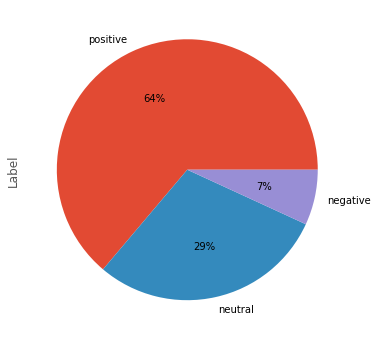

In [25]:
df_new.Label.value_counts().plot(kind='pie', autopct='%1.0f%%')

# Sentiment Analysis by Using Vader NLTK -Lexicon Method

In [26]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [27]:

from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

In [28]:
nltk.download('vader_lexicon') 

[nltk_data] Downloading package vader_lexicon to C:\Users\Madhu
[nltk_data]     Com\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [29]:
df_new['scores'] = df_new['CleanReview'].apply(lambda review: vader.polarity_scores(review))
df_new.head()

,CleanReview,Label,scores
0,room beyond expect clean everything staff nice...,positive,"{'neg': 0.0, 'neu': 0.522, 'pos': 0.478, 'comp..."
1,stay extremely comfortable beautiful hotel sur...,positive,"{'neg': 0.0, 'neu': 0.266, 'pos': 0.734, 'comp..."
2,definitely worth price pay convenient place he...,neutral,"{'neg': 0.115, 'neu': 0.569, 'pos': 0.315, 'co..."
3,meals location goodbetter change checkout time...,positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,worth money staff helpful friendly im happy se...,positive,"{'neg': 0.0, 'neu': 0.347, 'pos': 0.653, 'comp..."


In [30]:
df_new['compound']=df_new['scores'].apply(lambda score_dict: score_dict['compound'])

In [31]:
df_new['sentiment']=df_new['compound'].apply(lambda c: 'positive' if c> 0 else ('negative' if c<0 else 'neutral' ))
df_new.head()

,CleanReview,Label,scores,compound,sentiment
0,room beyond expect clean everything staff nice...,positive,"{'neg': 0.0, 'neu': 0.522, 'pos': 0.478, 'comp...",0.6705,positive
1,stay extremely comfortable beautiful hotel sur...,positive,"{'neg': 0.0, 'neu': 0.266, 'pos': 0.734, 'comp...",0.9651,positive
2,definitely worth price pay convenient place he...,neutral,"{'neg': 0.115, 'neu': 0.569, 'pos': 0.315, 'co...",0.9372,positive
3,meals location goodbetter change checkout time...,positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
4,worth money staff helpful friendly im happy se...,positive,"{'neg': 0.0, 'neu': 0.347, 'pos': 0.653, 'comp...",0.9802,positive


In [32]:
print('Vader accuracy score: ',accuracy_score(df_new['Label'],df_new['sentiment']))

Vader accuracy score:  0.6420629287911048


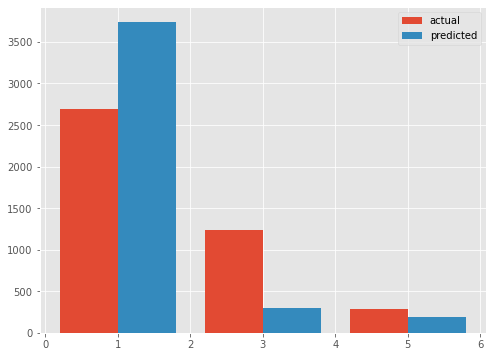

In [33]:


x=np.array([1,3,5])
y=df_new['Label'].value_counts()
z=df_new['sentiment'].value_counts()



plt.bar(x - 0.4, y,label='actual') # offset of -0.4
plt.bar(x + 0.4, z,label='predicted') # offset of  0.4
plt.legend()
plt.show()

# Sentiment Analysis for the Imbalanced Dataset - ML Algorithms

## Train and Test dataset

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test=train_test_split (df_new['CleanReview'],df_new['Label'],test_size=0.2,random_state=10)

In [36]:
np.random.seed(100)

In [37]:
Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_test = Encoder.fit_transform(y_test)

In [38]:
Tfidf_vect = TfidfVectorizer(max_features=1000)
Tfidf_vect.fit(X_train,X_test)

TfidfVectorizer(max_features=1000)

In [39]:
Train_X_Tfidf = Tfidf_vect.transform(X_train)
Test_X_Tfidf = Tfidf_vect.transform(X_test)

In [40]:
print(Tfidf_vect.vocabulary_)

{'second': 756, 'visit': 950, 'love': 510, 'everything': 295, 'breakfast': 107, 'best': 88, 'view': 946, 'staff': 819, 'take': 860, 'good': 374, 'care': 129, 'nothing': 600, 'place': 650, 'perfect': 640, 'one': 608, 'night': 591, 'stay': 829, 'dinner': 241, 'delicious': 227, 'service': 764, 'great': 379, 'location': 499, 'quiet': 695, 'peaceful': 636, 'close': 162, 'traffic': 904, 'noise': 594, 'well': 968, 'really': 708, 'friendly': 356, 'helpful': 401, 'owner': 624, 'help': 400, 'organize': 617, 'trip': 914, 'train': 905, 'kandy': 456, 'ella': 276, 'thank': 873, 'clean': 155, 'beautiful': 82, 'complain': 177, 'nice': 587, 'room': 740, 'little': 493, 'dirty': 245, 'owners': 625, 'locationwas': 501, 'request': 725, 'large': 474, 'bed': 84, 'show': 771, 'available': 64, 'site': 783, 'instead': 445, 'two': 927, 'single': 781, 'enjoy': 281, 'last': 475, 'drop': 263, 'pub': 689, 'right': 734, 'next': 586, 'door': 252, 'hotel': 426, 'temple': 870, 'tooth': 894, 'communication': 175, 'still'

In [41]:
print(Train_X_Tfidf)

  (0, 950)	0.35175239832749655
  (0, 946)	0.17592868202903283
  (0, 860)	0.2995371745427294
  (0, 819)	0.17324568641969623
  (0, 756)	0.4436736218262173
  (0, 600)	0.2674045101466702
  (0, 510)	0.32689478720683646
  (0, 374)	0.18025209102363693
  (0, 295)	0.25629897303676497
  (0, 129)	0.3777176078533485
  (0, 107)	0.17639774506591072
  (0, 88)	0.28000780348990933
  (1, 829)	0.20764021311913775
  (1, 764)	0.29533316777978447
  (1, 695)	0.3386442604580246
  (1, 650)	0.21964233597188584
  (1, 640)	0.2899132880121171
  (1, 636)	0.40998708968339903
  (1, 608)	0.27322921144046053
  (1, 591)	0.2902223487888407
  (1, 499)	0.18933138941591252
  (1, 379)	0.19687967568758832
  (1, 241)	0.3066264713948594
  (1, 227)	0.308154487436231
  (1, 107)	0.17925363654481657
  :	:
  (3379, 90)	0.39290375797643246
  (3379, 84)	0.23185775876522252
  (3380, 979)	0.2389056317226345
  (3380, 957)	0.19958587007059622
  (3380, 954)	0.1516264062667064
  (3380, 946)	0.19805598598720525
  (3380, 920)	0.34486892411277

## Naive Bayes Classification

In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
NB = naive_bayes.MultinomialNB()
NB.fit(Train_X_Tfidf,y_train)
predictions_NB = NB.predict(Test_X_Tfidf)
print("NB Accuracy Score : ",accuracy_score(predictions_NB, y_test)*100)
print(classification_report(predictions_NB,y_test))

NB Accuracy Score :  76.71394799054374
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.56      0.67      0.61       205
           2       0.94      0.80      0.86       641

    accuracy                           0.77       846
   macro avg       0.50      0.49      0.49       846
weighted avg       0.85      0.77      0.80       846



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[  0   0   0]
 [ 37 137  31]
 [ 21 108 512]]


Text(24.0, 0.5, 'Actual')

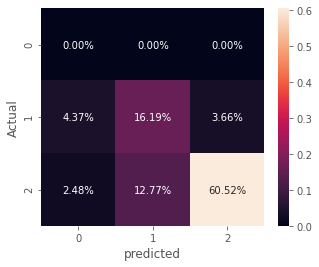

In [44]:
cm=confusion_matrix(predictions_NB, y_test)
print(cm)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(5,4))
sn.heatmap(cm/np.sum(cm), annot=True, fmt='.2%')
plt.xlabel('predicted')
plt.ylabel('Actual')

## Support Vector Machine Classification

In [45]:
SVM = svm.SVC()
SVM.fit(Train_X_Tfidf,y_train)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score : ",accuracy_score(predictions_SVM, y_test)*100)
print(classification_report(predictions_SVM,y_test))

SVM Accuracy Score :  78.1323877068558
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.66      0.67      0.66       240
           2       0.92      0.83      0.87       606

    accuracy                           0.78       846
   macro avg       0.53      0.50      0.51       846
weighted avg       0.85      0.78      0.81       846



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[  0   0   0]
 [ 36 161  43]
 [ 22  84 500]]


Text(24.0, 0.5, 'Actual')

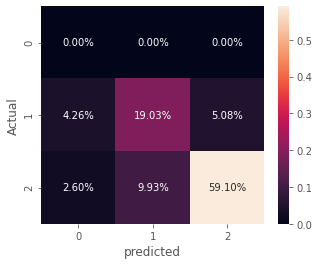

In [46]:
cm=confusion_matrix(predictions_SVM, y_test)
print(cm)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(5,4))
sn.heatmap(cm/np.sum(cm), annot=True, fmt='.2%')
plt.xlabel('predicted')
plt.ylabel('Actual')

## Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
LG=LogisticRegression(multi_class='multinomial')
LG.fit(Train_X_Tfidf,y_train)
predictions_LG=LG.predict(Test_X_Tfidf)
print("LG Accuracy Score : ",accuracy_score(predictions_LG, y_test)*100)
print(classification_report(predictions_LG,y_test))

LG Accuracy Score :  78.25059101654847
              precision    recall  f1-score   support

           0       0.03      0.40      0.06         5
           1       0.65      0.68      0.67       236
           2       0.92      0.83      0.87       605

    accuracy                           0.78       846
   macro avg       0.54      0.63      0.53       846
weighted avg       0.84      0.78      0.81       846



[[  2   1   2]
 [ 35 160  41]
 [ 21  84 500]]


Text(24.0, 0.5, 'Actual')

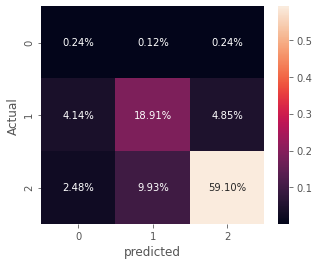

In [48]:
cm=confusion_matrix(predictions_LG, y_test)
print(cm)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(5,4))
sn.heatmap(cm/np.sum(cm), annot=True, fmt='.2%')
plt.xlabel('predicted')
plt.ylabel('Actual')

## Random Forest Classification

In [49]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(Train_X_Tfidf,y_train)
predictions_RF=RF.predict(Test_X_Tfidf)
print("RF Accuracy Score : ",accuracy_score(predictions_RF, y_test)*100)
print(classification_report(predictions_RF,y_test))

RF Accuracy Score :  77.42316784869976
              precision    recall  f1-score   support

           0       0.02      1.00      0.03         1
           1       0.59      0.69      0.63       209
           2       0.94      0.80      0.87       636

    accuracy                           0.77       846
   macro avg       0.51      0.83      0.51       846
weighted avg       0.85      0.77      0.81       846



[[  1   0   0]
 [ 32 144  33]
 [ 25 101 510]]


Text(24.0, 0.5, 'Actual')

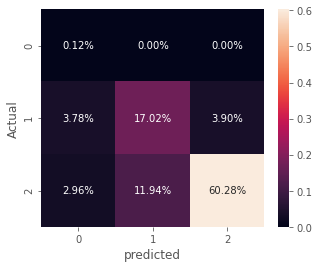

In [50]:
cm=confusion_matrix(predictions_RF, y_test)
print(cm)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(5,4))
sn.heatmap(cm/np.sum(cm), annot=True, fmt='.2%')
plt.xlabel('predicted')
plt.ylabel('Actual')

## Cross Validation Score 

In [51]:
Encoder = LabelEncoder()
Label = Encoder.fit_transform(df_new['Label'])
Tfidf_vect = TfidfVectorizer(max_features=1000)
Tfidf_vect.fit(df_new['CleanReview'])
X_Tfidf = Tfidf_vect.transform(df_new['CleanReview'])

In [52]:
from sklearn.model_selection import cross_val_score

In [53]:
NBcross=cross_val_score(naive_bayes.MultinomialNB(),X_Tfidf, Label)
print("cross_val_scores of Naive Bayes: \n",NBcross)
print("NB cross val mean:\n",NBcross.mean())
print("NB cross val std:\n",NBcross.std())


cross_val_scores of Naive Bayes: 
 [0.73286052 0.77541371 0.7443787  0.70650888 0.6816568 ]
NB cross val mean:
 0.7281637220753424
NB cross val std:
 0.0320916581128681


In [54]:
SVCcross=cross_val_score(svm.SVC(), X_Tfidf, Label)
print("cross_val_scores of SVM: \n",SVCcross)
print("SVM cross val mean:\n",SVCcross.mean())
print("SVM cross val std:\n",SVCcross.std())

cross_val_scores of SVM: 
 [0.69385343 0.74822695 0.74674556 0.72662722 0.69230769]
SVM cross val mean:
 0.7215521703246743
SVM cross val std:
 0.024472297911410586


In [55]:
LGcross=cross_val_score(LogisticRegression(), X_Tfidf, Label)
print("cross_val_scores of LG: \n",LGcross)
print("LG cross val mean:\n",LGcross.mean())
print("LG cross val std:\n",LGcross.std())

cross_val_scores of LG: 
 [0.69030733 0.73049645 0.74201183 0.72189349 0.69585799]
LG cross val mean:
 0.7161134192230756
LG cross val std:
 0.019936126115812015


In [56]:
RFcross=cross_val_score(RandomForestClassifier(), X_Tfidf, Label)
print("cross_val_scores of RF: \n",RFcross)
print("RF cross val mean:\n",RFcross.mean())
print("RF cross val std:\n",RFcross.std())

cross_val_scores of RF: 
 [0.69858156 0.75059102 0.71242604 0.69704142 0.6852071 ]
RF cross val mean:
 0.7087694266090339
RF cross val std:
 0.02262272369773409


# Over Sampling to Balance the Dataset 

In [57]:
df_new1=df_new[['CleanReview','Label']]
df_new1

,CleanReview,Label
0,room beyond expect clean everything staff nice...,positive
1,stay extremely comfortable beautiful hotel sur...,positive
2,definitely worth price pay convenient place he...,neutral
3,meals location goodbetter change checkout time...,positive
4,worth money staff helpful friendly im happy se...,positive
...,...,...
4279,place like hotel owner family helpful hospital...,positive
4280,amaze stay happy welcome family promise wont d...,positive
4281,host amaze love rooftop sunsets literally fini...,positive
4282,owner family nice people humble honest persona...,positive


In [58]:
class_count_0, class_count_1,class_count_2 = df_new1['Label'].value_counts()
class_count_0, class_count_1,class_count_2

(2698, 1239, 290)

In [59]:
y=df_new1['Label'].value_counts()
y

positive    2698
neutral     1239
negative     290
Name: Label, dtype: int64

In [60]:
class_0 = df_new1[df_new1['Label']=='positive']
class_0.shape

(2698, 2)

In [61]:
class_1 = df_new1[df_new1['Label']=='neutral']
class_1.shape

(1239, 2)

In [62]:
class_2=df_new1[df_new1['Label']=='negative']
class_2.shape


(290, 2)

In [63]:
class_2_over = class_2.sample(class_count_0, replace=True)
class_2_over.shape

(2698, 2)

In [64]:
test_over = pd.concat([class_2_over, class_0,class_1], axis=0)
test_over.head(3)

,CleanReview,Label
3728,near train station charge indicate book give p...,negative
369,nothingthe room infest baby cockroaches steep ...,negative
1147,name heavy traffic bus near hotel main bus sta...,negative


In [65]:
class_count_0, class_count_1,class_count_2 = test_over['Label'].value_counts()
class_count_0, class_count_1,class_count_2

(2698, 2698, 1239)

In [66]:
y1=test_over['Label'].value_counts()
y1

negative    2698
positive    2698
neutral     1239
Name: Label, dtype: int64

In [67]:
class_0 = test_over[test_over['Label']=='positive']
class_0.shape

(2698, 2)

In [68]:
class_1 = test_over[test_over['Label']=='neutral']
class_1.shape

(1239, 2)

In [69]:
class_2 = test_over[test_over['Label']=='negative']
class_2.shape

(2698, 2)

In [70]:
class_1_over = class_1.sample(class_count_0, replace=True)
class_1_over.shape

(2698, 2)

In [71]:
test_over_over = pd.concat([class_1_over, class_0,class_2], axis=0)
test_over_over

,CleanReview,Label
628,service good location hotel abit outdated need...,neutral
399,locationstaff friendly well welcome room look ...,neutral
3704,good locationi ants room floor dirty,neutral
1331,roof topnot really clean staff friendly,neutral
637,firstly would like highlight like get experien...,neutral
...,...,...
1137,nice place box bed nice comfortable share bath...,negative
2550,view balcony lovely sunset viewsthere bar site,negative
163,night reception guy good night reception guy good,negative
319,location spacious room ac tv wificleanliness b...,negative


negative    2698
positive    2698
neutral     2698
Name: Label, dtype: int64

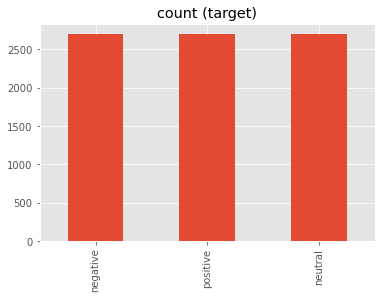

In [72]:
test_over_over['Label'].value_counts().plot(kind='bar', title='count (target)')
test_over_over['Label'].value_counts()

# ML Algorithms

## Train and Test Split 

In [73]:
print(test_over_over.shape)
X1=test_over_over['CleanReview']
y1=test_over_over['Label']      

(8094, 2)


In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.2,random_state=10)
print(y_train.shape)
print(y_test.shape)

(6475,)
(1619,)


In [75]:
np.random.seed(100)
Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_test = Encoder.fit_transform(y_test)
Tfidf_vect = TfidfVectorizer(max_features=1000)
Tfidf_vect.fit(X_train,X_test)
Train_X_Tfidf = Tfidf_vect.transform(X_train)
Test_X_Tfidf = Tfidf_vect.transform(X_test)

## Naive Bayes Classification

In [76]:
NB = naive_bayes.MultinomialNB()
NB.fit(Train_X_Tfidf,y_train)
# predict the labels on validation dataset
predictions_NB = NB.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("NB Accuracy Score : ",accuracy_score(predictions_NB, y_test)*100)
print(classification_report(predictions_NB,y_test))

NB Accuracy Score :  73.74922791846818
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       546
           1       0.61      0.73      0.67       478
           2       0.82      0.74      0.78       595

    accuracy                           0.74      1619
   macro avg       0.74      0.74      0.74      1619
weighted avg       0.75      0.74      0.74      1619



## Support Vector Machine Classification

In [77]:
SVM = svm.SVC()
SVM.fit(Train_X_Tfidf,y_train)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score : ",accuracy_score(predictions_SVM, y_test)*100)
print(classification_report(predictions_SVM,y_test))

SVM Accuracy Score :  91.47621988882027
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       536
           1       0.90      0.88      0.89       574
           2       0.86      0.90      0.88       509

    accuracy                           0.91      1619
   macro avg       0.92      0.92      0.92      1619
weighted avg       0.92      0.91      0.92      1619



## Logistic Regression 

In [78]:
from sklearn.linear_model import LogisticRegression
LG=LogisticRegression(multi_class='multinomial')
LG.fit(Train_X_Tfidf,y_train)
predictions_LG=LG.predict(Test_X_Tfidf)
print("LG Accuracy Score : ",accuracy_score(predictions_LG, y_test)*100)
print(classification_report(predictions_LG,y_test))

LG Accuracy Score :  79.74058060531192
              precision    recall  f1-score   support

           0       0.93      0.80      0.86       604
           1       0.69      0.79      0.74       491
           2       0.79      0.80      0.79       524

    accuracy                           0.80      1619
   macro avg       0.80      0.80      0.80      1619
weighted avg       0.81      0.80      0.80      1619



## Random Forest Classification

In [79]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(Train_X_Tfidf,y_train)
predictions_RF=RF.predict(Test_X_Tfidf)
print("RF Accuracy Score : ",accuracy_score(predictions_RF, y_test)*100)
print(classification_report(predictions_RF,y_test))

RF Accuracy Score :  92.21741815935763
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       532
           1       0.90      0.89      0.90       574
           2       0.87      0.90      0.89       513

    accuracy                           0.92      1619
   macro avg       0.92      0.92      0.92      1619
weighted avg       0.92      0.92      0.92      1619



## Cross Val Score for the  Balanced Dataset

In [80]:
Encoder = LabelEncoder()
Label = Encoder.fit_transform(test_over_over['Label'])
Tfidf_vect = TfidfVectorizer(max_features=1000)
Tfidf_vect.fit(test_over_over['CleanReview'])
X_Tfidf = Tfidf_vect.transform(test_over_over['CleanReview'])

In [81]:
NBcross=cross_val_score(naive_bayes.MultinomialNB(),X_Tfidf, Label)
print("cross_val_scores of Naive Bayes: \n",NBcross)
print("NB cross val mean:\n",NBcross.mean())
print("NB cross val std:\n",NBcross.std())


cross_val_scores of Naive Bayes: 
 [0.66399012 0.76343422 0.76837554 0.78196418 0.78244747]
NB cross val mean:
 0.7520423035782591
NB cross val std:
 0.04465317496246789


In [82]:
SVCcross=cross_val_score(svm.SVC(),X_Tfidf, Label)
print("cross_val_scores of SVM: \n",SVCcross)
print("SVM cross val mean:\n",SVCcross.mean())
print("SVM cross val std:\n",SVCcross.std())

cross_val_scores of SVM: 
 [0.83014206 0.91229154 0.91352687 0.92835083 0.93448702]
SVM cross val mean:
 0.9037596648574446
SVM cross val std:
 0.03777999056775804


In [83]:
LGcross=cross_val_score(LogisticRegression(), X_Tfidf, Label)
print("cross_val_scores of LG: \n",LGcross)
print("LG cross val mean:\n",LGcross.mean())
print("LG cross val std:\n",LGcross.std())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

cross_val_scores of LG: 
 [0.712168   0.8134651  0.82087708 0.82890673 0.82138443]
LG cross val mean:
 0.7993602698486988
LG cross val std:
 0.04386904955221006


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [84]:
RFcross=cross_val_score(RandomForestClassifier(),X_Tfidf, Label)
print("cross_val_scores of RF: \n",RFcross)
print("RF cross val mean:\n",RFcross.mean())
print("RF cross val std:\n",RFcross.std())

cross_val_scores of RF: 
 [0.84681902 0.9271155  0.91970352 0.93390982 0.94066749]
RF cross val mean:
 0.9136430719568536
RF cross val std:
 0.034131361364642766
